# Setup

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [2]:
import pickle
import numpy as np

import umap
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load sae features

In [5]:
file_path = '/content/drive/MyDrive/feature_acts_model_A.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_A = pickle.load(f)

In [6]:
file_path = '/content/drive/MyDrive/feature_acts_model_B.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_B = pickle.load(f)

# compare actvs UMAP-CCA

https://jbloomaus.github.io/SAELens/sae_table/#gemma-2b-res-jb

In [ ]:
# sae.cfg.d_sae

24576

Model A, GPT-2 small: 24576

Model B, Gemma-2b: 16384

In [7]:
from sklearn.cross_decomposition import CCA

reshaped_activations_A = feature_acts_model_A.reshape(32 * 128, 24576).cpu()
reshaped_activations_B = feature_acts_model_B.reshape(32 * 128, 16384).cpu()

reducer = umap.UMAP()
embedding1 = reducer.fit_transform(reshaped_activations_A)
embedding2 = reducer.fit_transform(reshaped_activations_B)

# Initialize CCA
cca = CCA(n_components=2)  # has to be 2 due to UMAP

# Fit the model; this is too slow, so use it on UMAP data
# cca.fit(reshaped_activations_A, reshaped_activations_B)
cca.fit(embedding1, embedding2)

# Transform the data
A_c, B_c = cca.transform(embedding1, embedding2)

# A_c and B_c are the transformed data in the canonical space
print("Canonical Correlations:")
print(cca.score(embedding1, embedding2))

# Optional: To see the correlation coefficients
corrs = [np.corrcoef(A_c[:, i], B_c[:, i])[0, 1] for i in range(A_c.shape[1])]
print("Correlation Coefficients:", corrs)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Canonical Correlations:
-0.6814046517176726
Correlation Coefficients: [0.28288795360575625, 0.06223484360593139]


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Canonical Correlations:
-0.6130227443460222
Correlation Coefficients: [0.34372082543144294, 0.0886886454159535]


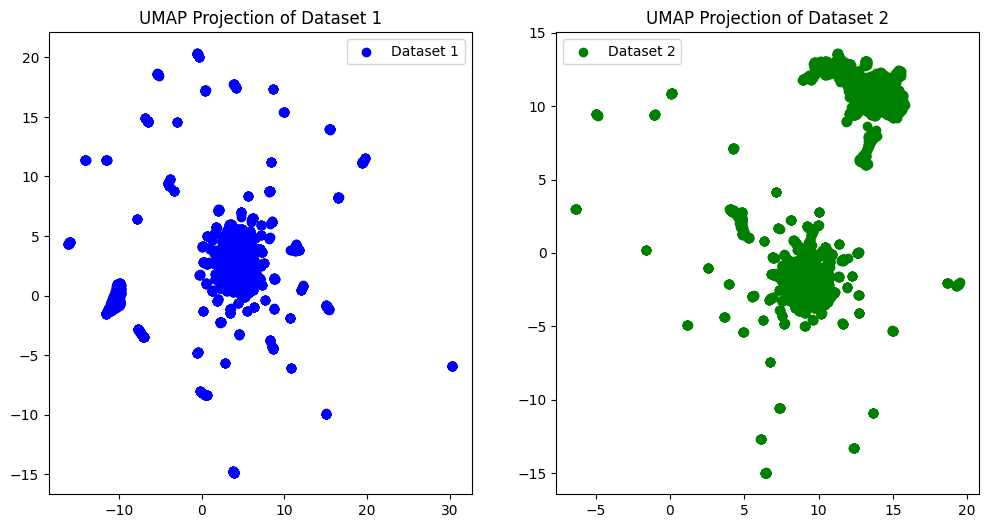

In [8]:
from sklearn.cross_decomposition import CCA

reshaped_activations_A = feature_acts_model_A.reshape(32 * 128, 24576).cpu()
reshaped_activations_B = feature_acts_model_B.reshape(32 * 128, 16384).cpu()

reducer = umap.UMAP()
embedding1 = reducer.fit_transform(reshaped_activations_A)
embedding2 = reducer.fit_transform(reshaped_activations_B)

cca = CCA(n_components=2)
cca.fit(embedding1, embedding2) # Fit the model after UMAP

# Transform the data
A_c, B_c = cca.transform(embedding1, embedding2)

# A_c and B_c are the transformed data in the canonical space
print("Canonical Correlations:")
print(cca.score(embedding1, embedding2))

# Optional: To see the correlation coefficients
corrs = [np.corrcoef(A_c[:, i], B_c[:, i])[0, 1] for i in range(A_c.shape[1])]
print("Correlation Coefficients:", corrs)

# Create Side-by-Side Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the first dataset
axes[0].scatter(embedding1[:, 0], embedding1[:, 1], c='blue', label='Dataset 1')
axes[0].set_title('UMAP Projection of Dataset 1')
axes[0].legend()

# Plot for the second dataset
axes[1].scatter(embedding2[:, 0], embedding2[:, 1], c='green', label='Dataset 2')
axes[1].set_title('UMAP Projection of Dataset 2')
axes[1].legend()

plt.show()